In [1]:
import sys
from importlib import reload 
sys.path.append('../hdssm_story/lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=False):
    # Just new dists
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_hs_corrected" if for_ranking else "triple_trainable_l1_hs",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_ex_corrected" if for_ranking else "triple_trainable_l1_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_ex_corrected" if for_ranking else "triple_trainable_l1_sq_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("hyperspherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_all(for_ranking=False):
    return [
        ProductDistances([
            (10, Distances("euclidian_corrected" if for_ranking else "euclidian",
                           scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_corrected" if for_ranking else "triple_trainable_l0",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected" if for_ranking else "triple_trainable_l1_sq",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected" if for_ranking else "triple_trainable_l1",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_hs_corrected" if for_ranking else "triple_trainable_l1_hs",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_ex_corrected" if for_ranking else "triple_trainable_l1_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_ex_corrected" if for_ranking else "triple_trainable_l1_sq_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("hyperspherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]

_____________


In [8]:
!ls ../datasets

3d_sphere_triang_120.edges   clique_4.edges		  graph.clusters
3d_sphere_triang_1920.edges  clique_5.edges		  karate.edges
3d_sphere_triang_30.edges    conflict.edges		  polblogs.edges
3d_sphere_triang_480.edges   cora			  polbooks.edges
airport.edges		     CSPhDs.edges		  power.edges
bg_20_700_0.05.edges	     cycle_100.edges		  reactome.edges
bipartite_100.edges	     cycle_5.edges		  smalltree.edges
bipartite_5.edges	     dolphins.edges		  star_100.edges
ca-cit-HepTh.edges	     eu-core.edges		  star_5.edges
Ca-HelpTh.edges		     eu-core-no-self-loops.edges  tree_3_6.edges
chicago.edges		     euroroad.edges		  usca312.edges
citeseer		     EuroSiS.edges		  wla6.edges
clique_100.edges	     facebook.edges		  wla6.nodes
clique_12.edges		     football.edges


In [9]:
    G, distances_matrix, r_matrix  = utils.get_dataset("power", True, True)
    make_model_g = lambda : make_model(len(G.nodes()))
    d = make_model_g()
    qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/power.edges
|V| = 4941, |E| = 6594


_____________________
# Training

In [10]:
distortion_loss_storyz = list()

In [11]:
def print_best_distortion():
    for i, d in enumerate(make_distances(False)+make_distances_exp_dot()):
        ar = np.array([
            distortion_loss_story_nth[i][-1]
            for distortion_loss_story_nth in distortion_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [12]:
def do_distortion_for_lr(lr=0.05):
    distortion_loss_storyz.append(
        utils.estimate_signatures_distortion(
            make_model_2, qs, distances_matrix, r_matrix,
            make_distances(False)+make_distances_exp_dot(), 2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            different_d_sum=True, print_results=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_distortion()

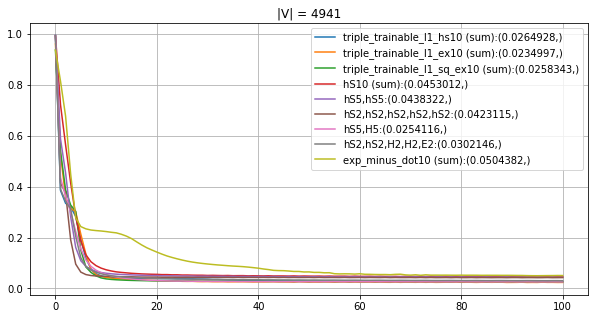


0.0264928	triple_trainable_l1_hs10 (sum)
0.0234997	triple_trainable_l1_ex10 (sum)
0.0258343	triple_trainable_l1_sq_ex10 (sum)
0.0453012	hS10 (sum)
0.0438322	hS5,hS5
0.0423115	hS2,hS2,hS2,hS2,hS2
0.0254116	hS5,H5
0.0302146	hS2,hS2,H2,H2,E2
0.0504382	exp_minus_dot10 (sum)


=== Current global best:

(0.0264928,)	triple_trainable_l1_hs10 (sum)
(0.0234997,)	triple_trainable_l1_ex10 (sum)
(0.0258343,)	triple_trainable_l1_sq_ex10 (sum)
(0.0453012,)	hS10 (sum)
(0.0438322,)	hS5,hS5
(0.0423115,)	hS2,hS2,hS2,hS2,hS2
(0.0254116,)	hS5,H5
(0.0302146,)	hS2,hS2,H2,H2,E2
(0.0504382,)	exp_minus_dot10 (sum)


In [13]:
do_distortion_for_lr(0.1)

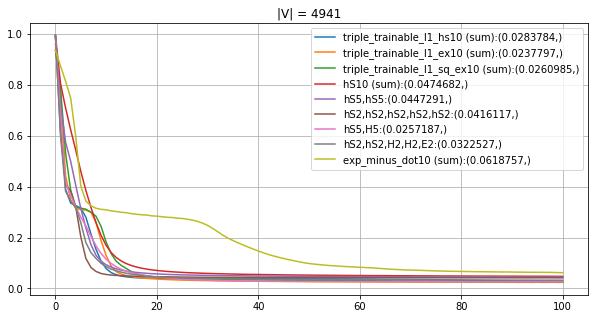


0.0283784	triple_trainable_l1_hs10 (sum)
0.0237797	triple_trainable_l1_ex10 (sum)
0.0260985	triple_trainable_l1_sq_ex10 (sum)
0.0474682	hS10 (sum)
0.0447291	hS5,hS5
0.0416117	hS2,hS2,hS2,hS2,hS2
0.0257187	hS5,H5
0.0322527	hS2,hS2,H2,H2,E2
0.0618757	exp_minus_dot10 (sum)


=== Current global best:

(0.0264928,)	triple_trainable_l1_hs10 (sum)
(0.0234997,)	triple_trainable_l1_ex10 (sum)
(0.0258343,)	triple_trainable_l1_sq_ex10 (sum)
(0.0453012,)	hS10 (sum)
(0.0438322,)	hS5,hS5
(0.0416117,)	hS2,hS2,hS2,hS2,hS2
(0.0254116,)	hS5,H5
(0.0302146,)	hS2,hS2,H2,H2,E2
(0.0504382,)	exp_minus_dot10 (sum)


In [14]:
do_distortion_for_lr(0.05)

In [15]:
softmax_loss_storyz = list()

In [16]:
def print_best_softmax():
    for i, d in enumerate(make_distances(True)+make_distances_exp_dot()):
        ar = np.array([
            softmax_loss_story_nth[i][-1]
            for softmax_loss_story_nth in softmax_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [17]:
def do_softmax_for_lr(lr=0.05):
    softmax_loss_storyz.append(
        utils.estimate_signatures_softmax(
            make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
            dists=make_distances(True)+make_distances_exp_dot(), iters=2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            print_results=True, different_d_sum=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_softmax()

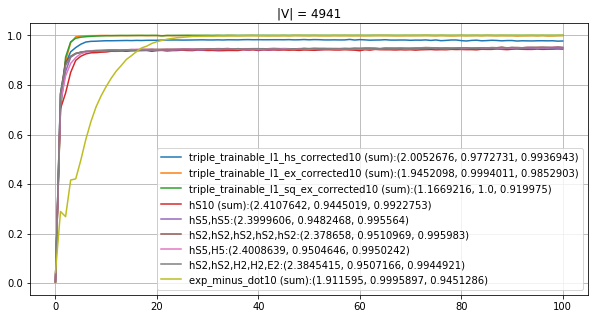


0.9772731	triple_trainable_l1_hs_corrected10 (sum)
0.9994011	triple_trainable_l1_ex_corrected10 (sum)
1.0	triple_trainable_l1_sq_ex_corrected10 (sum)
0.9445019	hS10 (sum)
0.9482468	hS5,hS5
0.9510969	hS2,hS2,hS2,hS2,hS2
0.9504646	hS5,H5
0.9507166	hS2,hS2,H2,H2,E2
0.9995897	exp_minus_dot10 (sum)


=== Current global best:

(2.0052676, 0.9772731, 0.9936943)	triple_trainable_l1_hs_corrected10 (sum)
(1.9452098, 0.9994011, 0.9852903)	triple_trainable_l1_ex_corrected10 (sum)
(1.1669216, 1.0, 0.919975)	triple_trainable_l1_sq_ex_corrected10 (sum)
(2.4107642, 0.9445019, 0.9922753)	hS10 (sum)
(2.3999606, 0.9482468, 0.995564)	hS5,hS5
(2.378658, 0.9510969, 0.995983)	hS2,hS2,hS2,hS2,hS2
(2.4008639, 0.9504646, 0.9950242)	hS5,H5
(2.3845415, 0.9507166, 0.9944921)	hS2,hS2,H2,H2,E2
(1.911595, 0.9995897, 0.9451286)	exp_minus_dot10 (sum)


In [18]:
do_softmax_for_lr(0.1)

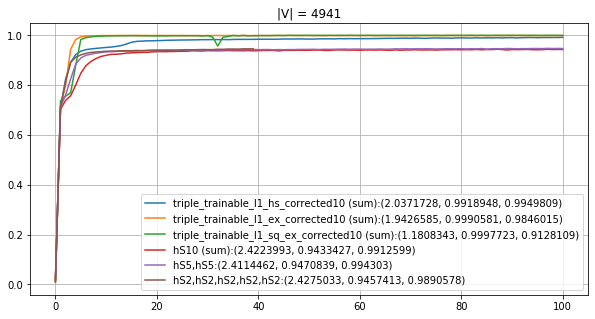

781:2.427407151530504
782:2.427368892520011
783:2.4273941389104636
784:2.427344307014131
785:2.4273418590833304
786:2.427322145676419
787:2.4272939926789583
788:2.427241685343418
789:2.427229455914688
790:2.4271996114546814
791:2.427192434721651
792:2.427148434631589
793:2.427137966711486
794:2.4271203534254595
795:2.4271003554954804


In [ ]:
do_softmax_for_lr(0.05)